# Chapter 2: Simple Linear Regression Exercises

## 2.1

Table B.1 gives data concerning the performance of the 26 National Football League teams in 1976. It is suspected that the number of yards gained rushing by opponents ($x_8$) has an effect on the number of games won by a team ($y$).
1. Fit a simple linear regression model relating games won $y$ to yards gained
rushing by opponents $x_8$.
2. Construct the analysis-of-variance table and test for significance of regression.
3. Find a $95\%$ CI on the slope.
4. What percent of the total variability in y is explained by this model?
5. Find a $95\%$ CI on the mean number of games won if opponents’ yards
rushing is limited to 2000 yards.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import linear_regression as lr

data = pd.read_csv("datasets/b1.csv")
x_data = data["x8"].values
y_data = data["y"].values

model = lr.LinearRegression(x = x_data, y = y_data)
print(model)

Simple linear regression model trained on 28 observations.
The estimated parameters are: 
   - b0: 21.79
   - b1: -0.01



In [2]:
model.individual_parameter_significance()

#------------------------------------------------------------------
Testing hypothesis H0: b0 = 0...
The value of the t-statistic with 26 degrees of freedom is: 8.08
The 0.025 quantile of the t-distribution with 26 degrees of freedom is: -2.06
The 0.975 quantile of the t-distribution with 26 degrees of freedom is: 2.06
The H0 hypothesis b0 = 0 is: REJECTED

#------------------------------------------------------------------
The value of the t-statistic with 26 degrees of freedom is: -5.58
The 0.025 quantile of the t-distribution with 26 degrees of freedom is: -2.06
The 0.975 quantile of the t-distribution with 26 degrees of freedom is: 2.06
The H0 hypothesis b1 = 0 is: REJECTED


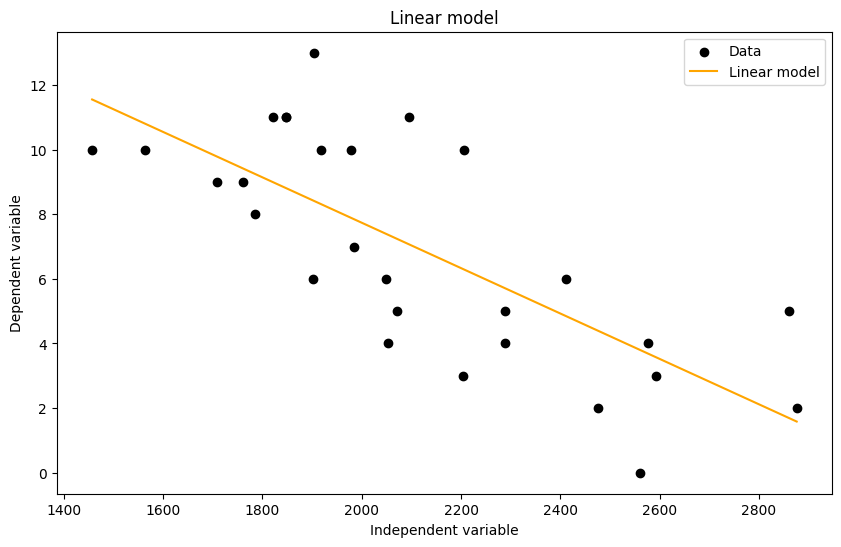

In [2]:
model.plot_linear_model_line()

- Construct the analysis-of-variance table and test for significance of regression:

The fundamental analysis-of-variance identity for a regression model:
$$SS_T = SS_R + SS_{Res}.$$

We can use the usual analysis of variance $F$ test to test the hypothesis that $H_0: b_1=0$. It can be shown that:
- $$SS_{Res} = \frac{(n-2)MS_{Res}}{\sigma^2} \sim \chi^2_{n-2}$$
- if the null hypothesis is true, then 
$$\frac{SS_R}{\sigma^2} \sim \chi^2_{1},$$
- $SS_{Res}, SS_R$ are independent.

Then:

$$F_0 = \frac{SS_R/df_R}{SS_{Res}/df_{Res}} = \frac{MS_R}{MS_{Res}} \sim F(1, n-2)$$

Analysis of variance identity breakdown:
  - total sum of squares (SST): 326.96,
  - regression sum of squares (SSR): 178.09,
  - residual sum of squares (SSRes): 148.87,

Assuming that the errors are normally distributed, we can use the F-test to check if the model is significant.
The F-statistic is: 31.10
The 0.95 quantile of the F-distribution with 1 and 26 degrees of freedom is: 4.23
The model is significant; the hypothesis H0: b1 = 0 is rejected.

The figure below shows the PDF for the F(1, n-2) distribution, and the value of the F-statistic, along with the 95% quantile.


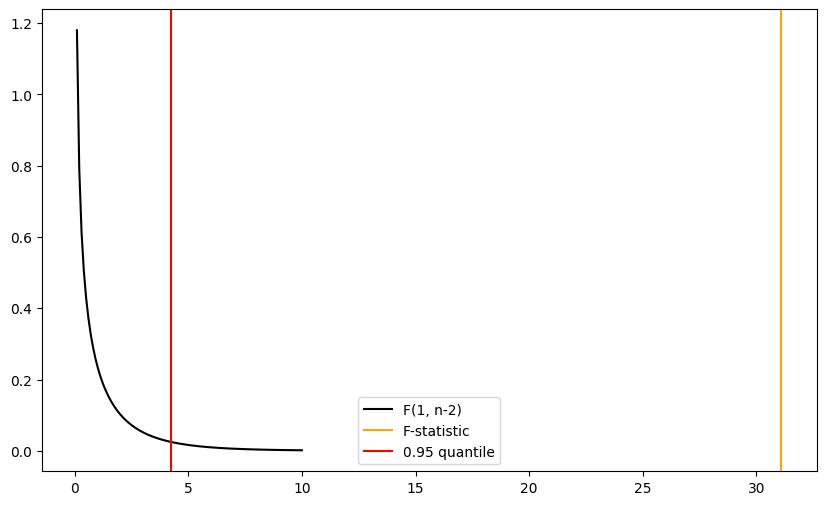

In [4]:
model.analysis_of_variance()

In [5]:
lower_bound_slope, upper_bound_slope = model.parameter_confidence_interval_estimate("b1", 0.05)
print("The 95% confidence interval for the slope parameter, b1, is: [{:.4f}, {:.4f}]".format(lower_bound_slope, upper_bound_slope))

The 95% confidence interval for the slope parameter, b1, is: [-0.0096, -0.0044]


In [6]:
r_squared = model.coefficient_of_determination()
print("The coefficient of determination, R^2, is: {:.4f}".format(r_squared))

The coefficient of determination, R^2, is: 0.5447


In [7]:
x0 = 2000

ll, ul = model.mean_response_confidence_interval(x = x0)
print("The 95% confidence interval for the mean response at x = {} is: [{:.4f}, {:.4f}]".format(x0, ll, ul))

The 95% confidence interval for the mean response at x = 2000 is: [6.7658, 8.7103]


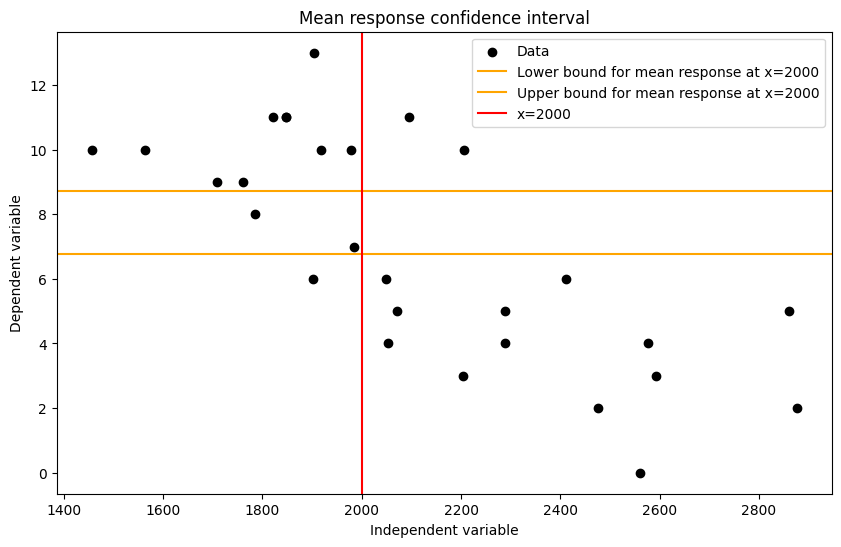

In [8]:
model.plot_mean_response_confidence_interval(x0 = x0)

## 2.2 

Suppose we would like to use the model developed in Problem 2.1 to predict the number of games a team will win if it can limit opponents’ yards rushing to 1800 yards. Find a point estimate of the number of games won when $x_8 = 1800$. Find a 90% prediction interval on the number of games won.

In [9]:
x = 1800

y_prediction = model.predict(x0 = x)
low_limit_prediction, upp_limit_prediction = model.prediction_confidence_interval(x = x, alpha = 0.05)

print("If the opponents yard rushing is limited to x=1800 yards, then the linear regression estimate for the number of games won is: {:.4f}".format(y_prediction))
print("The 95% prediction interval for the number of games won is: [{:.4f}, {:.4f}]".format(low_limit_prediction, upp_limit_prediction))

If the opponents yard rushing is limited to x=1800 yards, then the linear regression estimate for the number of games won is: 9.1431
The 95% prediction interval for the number of games won is: [4.0734, 14.2128]


## 2.3

Table B.2 presents data collected during a solar energy project at Georgia Tech.
1. Fit a simple linear regression model relating total heat flux $y$ (kilowatts) to the radial deflection of the deflected rays $x_4$ (milliradians).
2. Construct the analysis-of-variance table and test for significance of regression.
3. Find a 99% CI on the slope.
4. Calculate R2.
5. Find a 95% CI on the mean heat flux when the radial deflection is 16.5 milliradians.

In [10]:
solar_energy = pd.read_csv("datasets/b2.csv")

solar_energy_x = solar_energy["x4"].values
solar_energy_y = solar_energy["y"].values

solar_energy_model = lr.LinearRegression(x = solar_energy_x, y = solar_energy_y)
print("The least-squares estimate for simple linear regression parameters is:")
print("  - b0: {:.4f}".format(solar_energy_model.fit()["b0"]))
print("  - b1: {:.4f}".format(solar_energy_model.fit()["b1"]))

The least-squares estimate for simple linear regression parameters is:
  - b0: 607.1033
  - b1: -21.4025


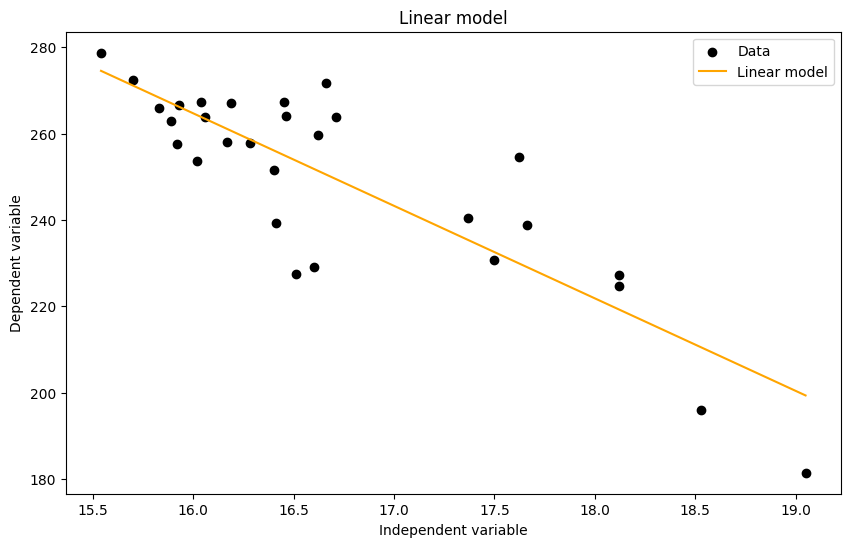

In [11]:
solar_energy_model.plot_linear_model_line()

Analysis of variance identity breakdown:
  - total sum of squares (SST): 14681.93,
  - regression sum of squares (SSR): 10578.68,
  - residual sum of squares (SSRes): 4103.24,

Assuming that the errors are normally distributed, we can use the F-test to check if the model is significant.
The F-statistic is: 69.61
The 0.95 quantile of the F-distribution with 1 and 27 degrees of freedom is: 4.21
The model is significant; the hypothesis H0: b1 = 0 is rejected.

The figure below shows the PDF for the F(1, n-2) distribution, and the value of the F-statistic, along with the 95% quantile.


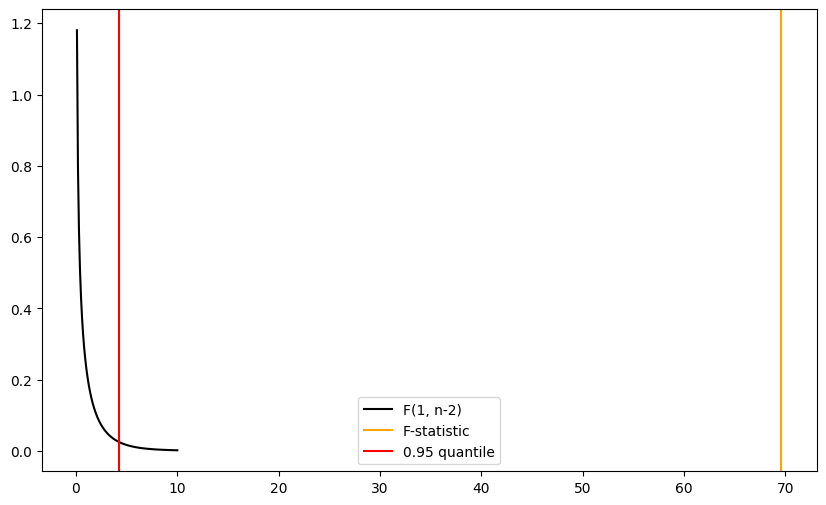

In [12]:
solar_energy_model.analysis_of_variance()

In [13]:
alpha_slope_ci = 0.01
ll_slope, ul_slope = solar_energy_model.parameter_confidence_interval_estimate("b1", alpha_slope_ci)

print("The {}% confidence interval for the slope parameter, b1, is: [{:.4f}, {:.4f}]".format((1 - alpha_slope_ci) * 100, ll_slope, ul_slope))
print("The length of the interval is {:.4f}".format(ul_slope - ll_slope))


The 99.0% confidence interval for the slope parameter, b1, is: [-28.5100, -14.2950]
The length of the interval is 14.2150


In [14]:
solar_energy_r2 = solar_energy_model.coefficient_of_determination()

print("The coefficient of determination, R^2, is: {:.4f}".format(solar_energy_r2))

The coefficient of determination, R^2, is: 0.7205


In [15]:
radial_reflection_value = 16.5
alpha_mean_response_ci = 0.05

ll_mean_response, ul_mean_response = solar_energy_model.mean_response_confidence_interval(x = radial_reflection_value, alpha = alpha_mean_response_ci)

print("The {}% confidence interval for the mean response at x = {} is: [{:.4f}, {:.4f}]".format((1 - alpha_mean_response_ci) * 100, radial_reflection_value, ll_mean_response, ul_mean_response))
print("The length of the interval is {:.4f}".format(ul_mean_response - ll_mean_response))

The 95.0% confidence interval for the mean response at x = 16.5 is: [249.1468, 258.7787]
The length of the interval is 9.6319


## 2.4

Table B.3 presents data on the gasoline mileage performance of 32 different automobiles.
1. Fit a simple linear regression model relating gasoline mileage $y$ (miles per gallon) to engine displacement $x_1$ (cubic inches).
2. Construct the analysis-of-variance table and test for significance of regression.
3. What percent of the total variability in gasoline mileage is accounted for
by the linear relationship with engine displacement?
4. Find a 95% CI on the mean gasoline mileage if the engine displacement is 275 in^3.
5. Suppose that we wish to predict the gasoline mileage obtained from a car with a 275-in^3 engine. Give a point estimate of mileage. Find a 95% prediction interval on the mileage.
6. Compare the two intervals obtained in parts d and e. Explain the difference between them. Which one is wider, and why?

In [16]:
gasoline_data = pd.read_csv("datasets/b3.csv")

gasoline_data_x = gasoline_data["x1"].values
gasoline_data_y = gasoline_data["y"].values

gasoline_model_1 = lr.LinearRegression(x = gasoline_data_x, y = gasoline_data_y)

print("Model parameters for gasoline dataset: b1 = {:.2f}, b0 = {:.2f}".format(gasoline_model_1.fit()["b1"], gasoline_model_1.fit()["b0"]))

Model parameters for gasoline dataset: b1 = -0.04, b0 = 32.17


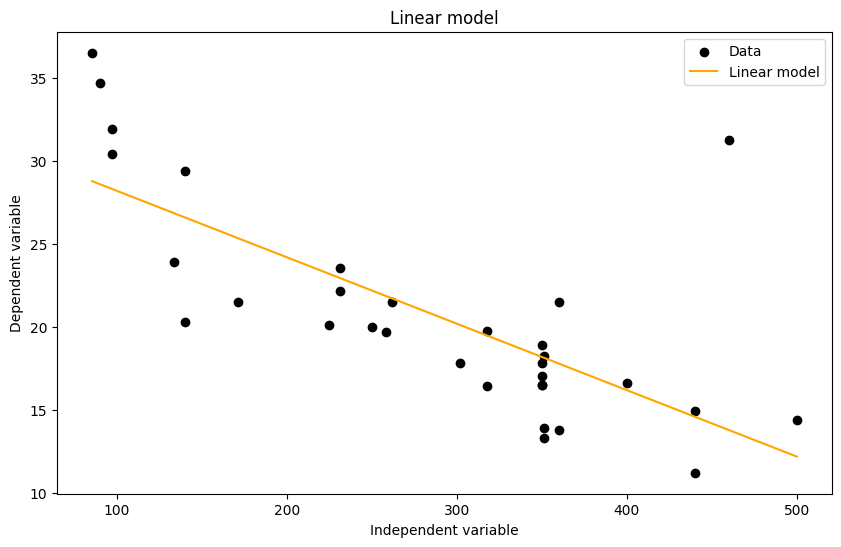

In [17]:
gasoline_model_1.plot_linear_model_line()

Analysis of variance identity breakdown:
  - total sum of squares (SST): 1301.11,
  - regression sum of squares (SSR): 679.52,
  - residual sum of squares (SSRes): 621.59,

Assuming that the errors are normally distributed, we can use the F-test to check if the model is significant.
The F-statistic is: 32.80
The 0.95 quantile of the F-distribution with 1 and 30 degrees of freedom is: 4.17
The model is significant; the hypothesis H0: b1 = 0 is rejected.

The figure below shows the PDF for the F(1, n-2) distribution, and the value of the F-statistic, along with the 95% quantile.


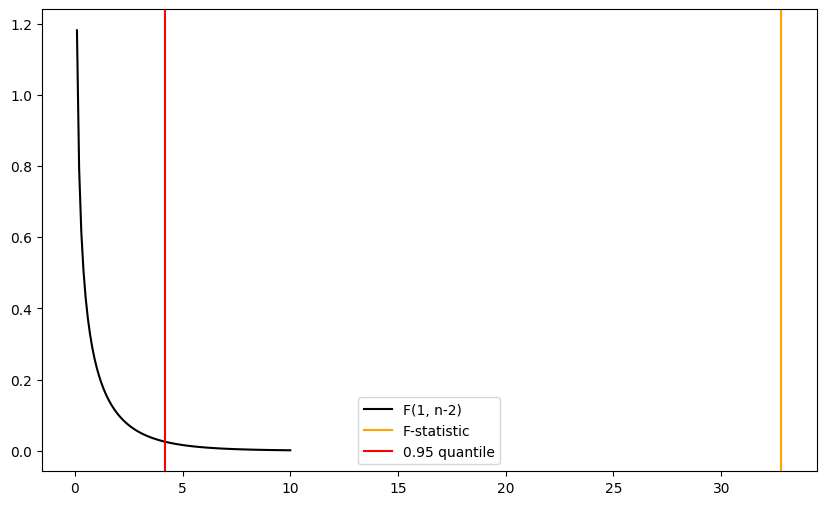

In [18]:
gasoline_model_1.analysis_of_variance()

In [19]:
r2_gasoline_01 = gasoline_model_1.coefficient_of_determination()

print("The coefficient of determination, R^2, is: {:.4f}".format(r2_gasoline_01))

The coefficient of determination, R^2, is: 0.5223


In [20]:
x0 = 275

ll, ul = gasoline_model_1.mean_response_confidence_interval(x = x0)

print("The 95% confidence interval for the mean response at x = {} is: [{:.4f}, {:.4f}]".format(x0, ll, ul))

The 95% confidence interval for the mean response at x = 275 is: [19.5257, 22.8241]


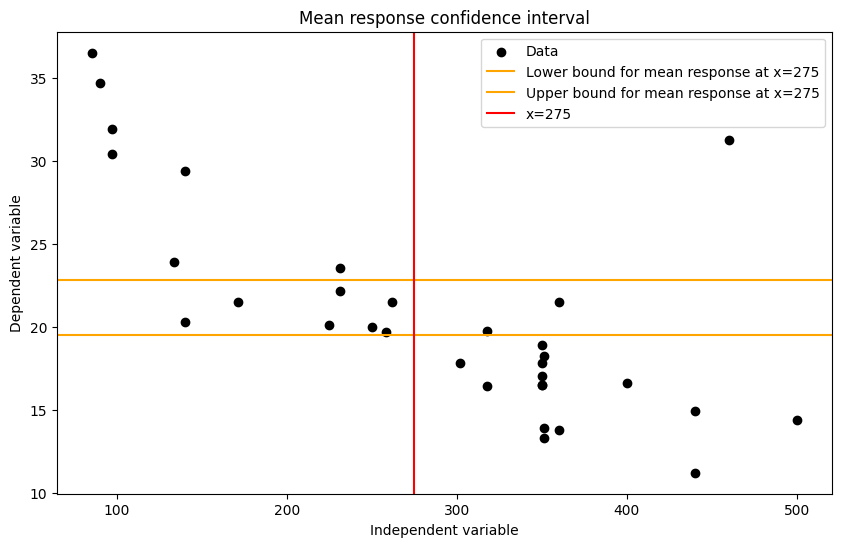

In [21]:
gasoline_model_1.plot_mean_response_confidence_interval(x0 = x0)

In [22]:
x0 = 275

ll_prediction, ul_prediction = gasoline_model_1.prediction_confidence_interval(x = x0, alpha = 0.05)

print("The 95% prediction interval for the response at x = {} is: [{:.4f}, {:.4f}]".format(x0, ll_prediction, ul_prediction))

The 95% prediction interval for the response at x = 275 is: [11.7335, 30.6162]


In [23]:
print("The length of the interval for the mean response at x0 = {} is {:.4f}".format(x0, ul - ll))
print("The length of the interval for the prediction at x0 = {} is {:.4f}".format(x0, ul_prediction - ll_prediction))

shorter_interval = "mean_response" if (ul - ll) < (ul_prediction - ll_prediction) else "prediction"

print("The {} interval is shorter".format(shorter_interval))

The length of the interval for the mean response at x0 = 275 is 3.2984
The length of the interval for the prediction at x0 = 275 is 18.8827
The mean_response interval is shorter


## 2.5

Consider the gasoline mileage data in Table B.3. Repeat Problem 2.4 (parts a, b, and c) using vehicle weight $x_{10}$ as the regressor variable. Based on a comparison of the two models, can you conclude that $x_1$ is a better choice of regressor than $x_{10}$?

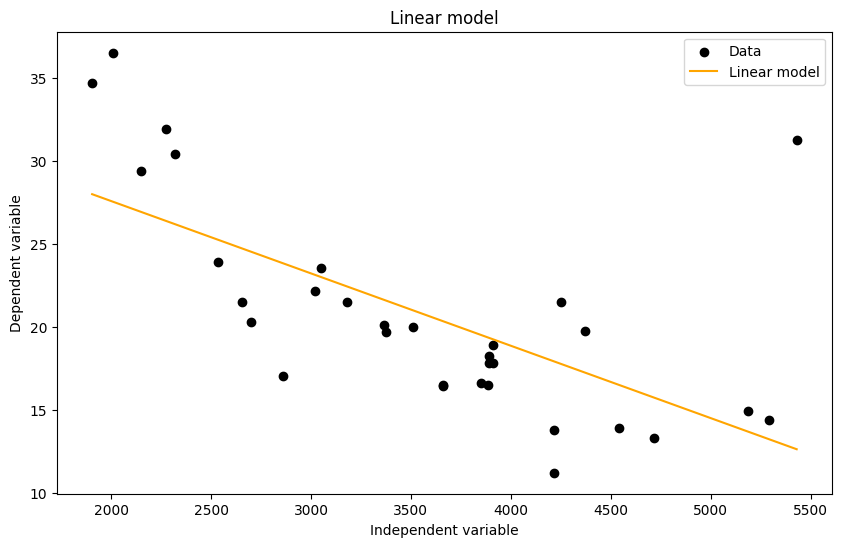

In [24]:
gasoline_data_2_x = gasoline_data["x10"].values
gasoline_data_2_y = gasoline_data["y"].values

gasoline_model_2 = lr.LinearRegression(x = gasoline_data_2_x, y = gasoline_data_2_y)

gasoline_model_2.plot_linear_model_line()

Analysis of variance identity breakdown:
  - total sum of squares (SST): 1301.11,
  - regression sum of squares (SSR): 537.22,
  - residual sum of squares (SSRes): 763.89,

Assuming that the errors are normally distributed, we can use the F-test to check if the model is significant.
The F-statistic is: 21.10
The 0.95 quantile of the F-distribution with 1 and 30 degrees of freedom is: 4.17
The model is significant; the hypothesis H0: b1 = 0 is rejected.

The figure below shows the PDF for the F(1, n-2) distribution, and the value of the F-statistic, along with the 95% quantile.


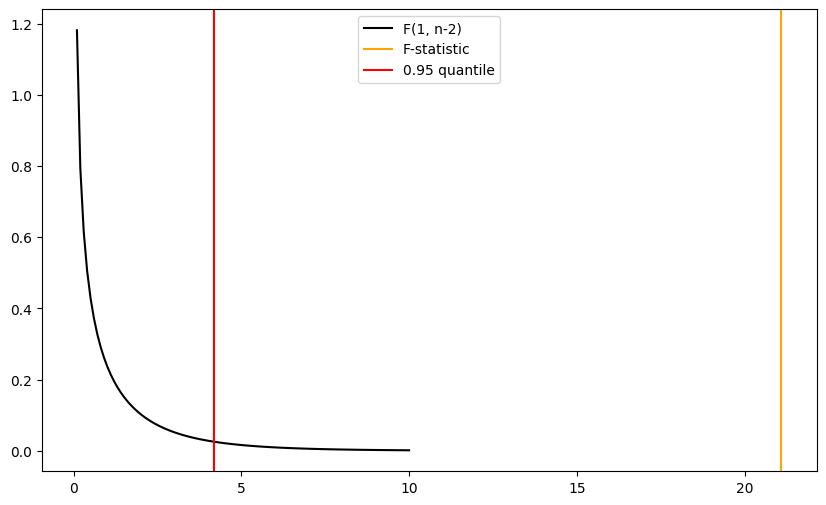

In [25]:
gasoline_model_2.analysis_of_variance()

In [26]:
r2_second_model = gasoline_model_2.coefficient_of_determination()

stronger_model = "x10" if r2_second_model > r2_gasoline_01 else "x1"

print("The R2 value for regressor x1: {:.4f}".format(r2_gasoline_01))
print("The R2 value for regressor x10: {:.4f}".format(r2_second_model))
print("The model with regressor {} is stronger".format(stronger_model))

The R2 value for regressor x1: 0.5223
The R2 value for regressor x10: 0.4129
The model with regressor x1 is stronger
